# Data processing graduation_train

In [46]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostRegressor
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from classifier_test_framework import ClassifierTestFramework
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv("graduation_train.csv")

# print(df.isnull().sum())

num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

print(num_cols)
print(cat_cols)

for colum in df.columns:
    df = df[df[colum] != ""]
    if len(df[df[colum] < 0]) > 0:
        print("negative value")

print(df)

df["curricular_units_1st_sem_grade_rounded"] = df["curricular_units_1st_sem_grade"].round(0)
df["curricular_units_2nd_sem_grade_rounded"] = df["curricular_units_2nd_sem_grade"].round(0)

df["passing_grade_1st_sem"] = df["curricular_units_1st_sem_grade_rounded"] >= 10
df["passing_grade_2nd_sem"] = df["curricular_units_2nd_sem_grade_rounded"] >= 10
df["passed_both_semesters"] = df["passing_grade_1st_sem"] & df["passing_grade_2nd_sem"]

Index(['student_id', 'marital_status', 'application_mode', 'application_order',
       'course', 'attendance_type', 'previous_qualification', 'nationality',
       'mother_qualification', 'father_qualification', 'mother_occupation',
       'father_occupation', 'displaced', 'special_needs', 'debtor',
       'tuition_fees_up_to_date', 'gender', 'scholarship_holder',
       'age_at_enrollment', 'international',
       'curricular_units_1st_sem_credited',
       'curricular_units_1st_sem_enrolled',
       'curricular_units_1st_sem_evaluations',
       'curricular_units_1st_sem_approved', 'curricular_units_1st_sem_grade',
       'curricular_units_1st_sem_without_evaluations',
       'curricular_units_2nd_sem_credited',
       'curricular_units_2nd_sem_enrolled',
       'curricular_units_2nd_sem_evaluations',
       'curricular_units_2nd_sem_approved', 'curricular_units_2nd_sem_grade',
       'curricular_units_2nd_sem_without_evaluations', 'unemployment_rate',
       'inflation_rate', 'gdp',

First we remove all empty items and split up the scores into 20 distinct classes.
And add 2 new columns to define wether they had a passing grade in the first or second semester

## Pass information and gender

Percentage of target = 1 60.85%


/tmp/ipykernel_13475/3226087662.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Passed": [len(df[df["target"] == 0][df["gender"] == 0])/len(df[df["gender"] == 0]), len(df[df["target"] == 1][df["gender"] == 0])/len(df[df["gender"] == 0]), len(df[df["target"] == 0][df["gender"] == 1])/len(df[df["gender"] == 1]), len(df[df["target"] == 1][df["gender"] == 1])/len(df[df["gender"] == 1])],
/tmp/ipykernel_13475/3226087662.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Passed": [len(df[df["target"] == 0][df["gender"] == 0])/len(df[df["gender"] == 0]), len(df[df["target"] == 1][df["gender"] == 0])/len(df[df["gender"] == 0]), len(df[df["target"] == 0][df["gender"] == 1])/len(df[df["gender"] == 1]), len(df[df["target"] == 1][df["gender"] == 1])/len(df[df["gender"] == 1])],
/tmp/ipykernel_13475/3226087662.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "Passed": [len(df[df["target"] ==

Total count 2.0 2904
Percentage of target = 1 60.85%


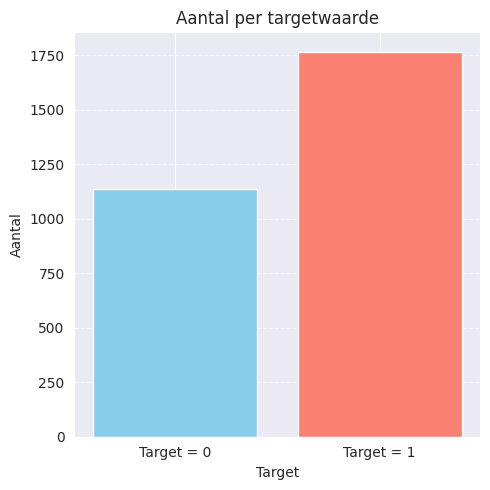

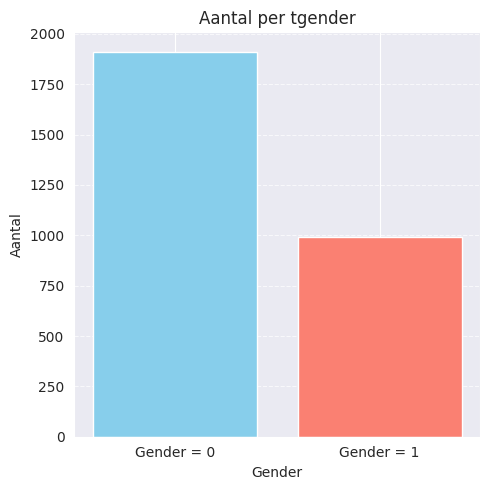

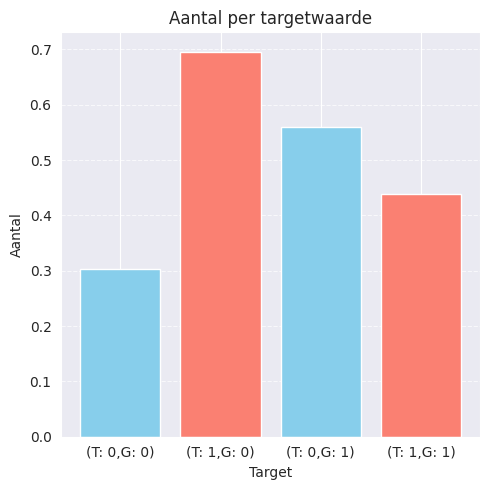

In [47]:
plt.figure(figsize=(5, 5))
data = {
    "Passed": [len(df[df["target"] == 0]), len(df[df["target"] == 1])],
}

labels = ['Target = 0', 'Target = 1']
values = data["Passed"]

plt.bar(labels, values, color=['skyblue', 'salmon'])
plt.title('Aantal per targetwaarde')
plt.xlabel('Target')
plt.ylabel('Aantal')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("images/target_counts.png")

print(f"Percentage of target = 1 {len(df[df['target'] == 1]) / len(df) * 100:.2f}%")


plt.figure(figsize=(5, 5))
data = {
    "Gender": [len(df[df["gender"] == 0]), len(df[df["gender"] == 1])],
}

labels = ['Gender = 0', 'Gender = 1']
values = data["Gender"]

plt.bar(labels, values, color=['skyblue', 'salmon'])
plt.title('Aantal per tgender')
plt.xlabel('Gender')
plt.ylabel('Aantal')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("images/target_counts.png")
plt.figure(figsize=(5, 5))

data = {
    "Passed": [len(df[df["target"] == 0][df["gender"] == 0])/len(df[df["gender"] == 0]), len(df[df["target"] == 1][df["gender"] == 0])/len(df[df["gender"] == 0]), len(df[df["target"] == 0][df["gender"] == 1])/len(df[df["gender"] == 1]), len(df[df["target"] == 1][df["gender"] == 1])/len(df[df["gender"] == 1])],
}

labels = ['(T: 0,G: 0)', '(T: 1,G: 0)', '(T: 0,G: 1)', '(T: 1,G: 1)']
values = data["Passed"]

plt.bar(labels, values, color=['skyblue', 'salmon'])
plt.title('Aantal per targetwaarde')
plt.xlabel('Target')
plt.ylabel('Aantal')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("images/target_counts.png")

print(f"Total count {sum(data['Passed'])} {len(df)}")

print(f"Percentage of target = 1 {len(df[df['target'] == 1]) / len(df) * 100:.2f}%")

## Data processing graduation_test

In [48]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from classifier_test_framework import ClassifierTestFramework
import pandas as pd
import numpy as np
import seaborn as sns

graduation_test_df = pd.read_csv("graduation_test.csv")

# print(df.isnull().sum())

num_cols = graduation_test_df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = graduation_test_df.select_dtypes(include=["object"]).columns

print(num_cols)
print(cat_cols)

for colum in graduation_test_df.columns:
    graduation_test_df = graduation_test_df[graduation_test_df[colum] != ""]
    if len(graduation_test_df[graduation_test_df[colum] < 0]) > 0:
        print("negative value")

print(graduation_test_df)

graduation_test_df["curricular_units_1st_sem_grade_rounded"] = graduation_test_df["curricular_units_1st_sem_grade"].round(0)
graduation_test_df["curricular_units_2nd_sem_grade_rounded"] = graduation_test_df["curricular_units_2nd_sem_grade"].round(0)

graduation_test_df["passing_grade_1st_sem"] = graduation_test_df["curricular_units_1st_sem_grade_rounded"] >= 10
graduation_test_df["passing_grade_2nd_sem"] = graduation_test_df["curricular_units_2nd_sem_grade_rounded"] >= 10
graduation_test_df["passed_both_semesters"] = graduation_test_df["passing_grade_1st_sem"] & graduation_test_df["passing_grade_2nd_sem"]

Index(['student_id', 'marital_status', 'application_mode', 'application_order',
       'course', 'attendance_type', 'previous_qualification', 'nationality',
       'mother_qualification', 'father_qualification', 'mother_occupation',
       'father_occupation', 'displaced', 'special_needs', 'debtor',
       'tuition_fees_up_to_date', 'gender', 'scholarship_holder',
       'age_at_enrollment', 'international',
       'curricular_units_1st_sem_credited',
       'curricular_units_1st_sem_enrolled',
       'curricular_units_1st_sem_evaluations',
       'curricular_units_1st_sem_approved', 'curricular_units_1st_sem_grade',
       'curricular_units_1st_sem_without_evaluations',
       'curricular_units_2nd_sem_credited',
       'curricular_units_2nd_sem_enrolled',
       'curricular_units_2nd_sem_evaluations',
       'curricular_units_2nd_sem_approved', 'curricular_units_2nd_sem_grade',
       'curricular_units_2nd_sem_without_evaluations', 'unemployment_rate',
       'inflation_rate', 'gdp']

## gender info

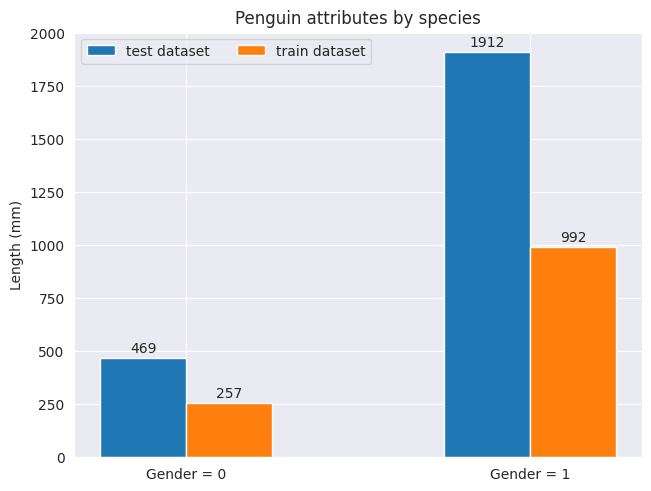

			 Gender:0 	 Gender:1
Train dataset gender in: 0.6584022038567493	0.3415977961432507
Test dataset gender in: 0.6460055096418733	0.35399449035812675


In [49]:

data = {
    "test dataset": [len(graduation_test_df[graduation_test_df["gender"] == 0]), len(df[df["gender"] == 0])],
    "train dataset": [len(graduation_test_df[graduation_test_df["gender"] == 1]), len(df[df["gender"] == 1])],
}

labels = ['Gender = 0', 'Gender = 1']

fig, ax = plt.subplots(layout='constrained')
x = np.arange(len(labels))  # the label locations

width = 0.25  # the width of the bars
multiplier = 0.5
for attribute, measurement in data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=2)
    multiplier += 1

ax.set_xticks(x + width, labels)

ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, labels)
ax.legend(loc='upper left', ncols=2)

plt.show()

print("\t\t\t Gender:0 \t Gender:1")
print(f"Train dataset gender in: " + str(len(df[df["gender"] == 0])/len(df)) + "\t" +  str(len(df[df["gender"] == 1])/len(df)))
print(f"Test dataset gender in: " + str(len(graduation_test_df[graduation_test_df["gender"] == 0])/len(graduation_test_df)) + "\t" +  str(len(graduation_test_df[graduation_test_df["gender"] == 1])/len(graduation_test_df)))



# Feature selection

In [50]:
colum_combinations = {
    "academic_performance_indicators": [
        'curricular_units_1st_sem_credited',
        'curricular_units_1st_sem_enrolled', 'curricular_units_1st_sem_evaluations',
        'curricular_units_1st_sem_approved', 'curricular_units_1st_sem_grade',
        'curricular_units_1st_sem_without_evaluations', 'curricular_units_2nd_sem_credited',
        'curricular_units_2nd_sem_enrolled', 'curricular_units_2nd_sem_evaluations',
        'curricular_units_2nd_sem_approved', 'curricular_units_2nd_sem_grade',
        'curricular_units_2nd_sem_without_evaluations',
        'curricular_units_1st_sem_grade_rounded', 'curricular_units_2nd_sem_grade_rounded',
        'passing_grade_1st_sem', 'passing_grade_2nd_sem'
    ],
    "person_and_economic_indicator": [
        'marital_status', 'application_mode', 'application_order', 'course', 'attendance_type',
        'previous_qualification', 'nationality', 'mother_qualification', 'father_qualification', 'mother_occupation',
        'father_occupation', 'displaced', 'special_needs', 'debtor', 'tuition_fees_up_to_date',
        'scholarship_holder', 'age_at_enrollment', 'international', 'curricular_units_1st_sem_credited',
        'unemployment_rate', 'inflation_rate', 'gdp'
    ],
    "person_and_economic_and_academic_performance_indicators": [
        'marital_status', 'application_mode', 'application_order', 'course', 'attendance_type',
        'previous_qualification', 'nationality', 'mother_qualification', 'father_qualification', 'mother_occupation',
        'father_occupation', 'displaced', 'special_needs', 'debtor', 'tuition_fees_up_to_date',
        'scholarship_holder', 'age_at_enrollment', 'international', 'curricular_units_1st_sem_credited',
        'curricular_units_1st_sem_enrolled', 'curricular_units_1st_sem_evaluations',
        'curricular_units_1st_sem_approved', 'curricular_units_1st_sem_grade',
        'curricular_units_1st_sem_without_evaluations', 'curricular_units_2nd_sem_credited',
        'curricular_units_2nd_sem_enrolled', 'curricular_units_2nd_sem_evaluations',
        'curricular_units_2nd_sem_approved', 'curricular_units_2nd_sem_grade',
        'curricular_units_2nd_sem_without_evaluations', 'unemployment_rate', 'inflation_rate', 'gdp',
        'curricular_units_1st_sem_grade_rounded', 'curricular_units_2nd_sem_grade_rounded',
        'passing_grade_1st_sem', 'passing_grade_2nd_sem', "gender"]
}

In [51]:
def select_kbest(X_train_full, y_train_full, k=10, score_function=f_classif):
    selector = SelectKBest(score_func=f_classif, k=k)
    selector.fit(X_train_full, y_train_full)

    # Get boolean mask of selected features
    mask = selector.get_support()

    # Get column names of selected features
    selected_features = X_train_full.columns[mask]

    return selected_features

### Best performing features

In [52]:
for score_function in [chi2, f_classif]:
    for k in [5,10,15,20,25,30]:
        x = df[colum_combinations["person_and_economic_and_academic_performance_indicators"]]
        y = df[["target"]]
        b_best_features = select_kbest(x, y, k, score_function)
        print(f"K: {k} best features: {b_best_features}")

colum_combinations["k_10_best"] = select_kbest(x, y, k, score_function)

K: 5 best features: Index(['curricular_units_1st_sem_approved',
       'curricular_units_2nd_sem_approved', 'curricular_units_2nd_sem_grade',
       'curricular_units_2nd_sem_grade_rounded', 'passing_grade_2nd_sem'],
      dtype='object')
K: 10 best features: Index(['tuition_fees_up_to_date', 'scholarship_holder',
       'curricular_units_1st_sem_approved', 'curricular_units_1st_sem_grade',
       'curricular_units_2nd_sem_approved', 'curricular_units_2nd_sem_grade',
       'curricular_units_1st_sem_grade_rounded',
       'curricular_units_2nd_sem_grade_rounded', 'passing_grade_1st_sem',
       'passing_grade_2nd_sem'],
      dtype='object')
K: 15 best features: Index(['application_mode', 'debtor', 'tuition_fees_up_to_date',
       'scholarship_holder', 'age_at_enrollment',
       'curricular_units_1st_sem_approved', 'curricular_units_1st_sem_grade',
       'curricular_units_2nd_sem_enrolled',
       'curricular_units_2nd_sem_approved', 'curricular_units_2nd_sem_grade',
       'curricu

/home/steen/Documents/Data mining project/Assignment2/.venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/steen/Documents/Data mining project/Assignment2/.venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/steen/Documents/Data mining project/Assignment2/.venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/steen/Documents/Data mining project/Assignment2/.venv/lib/pyt

Splitting dataset


In [53]:
from sklearn.model_selection import train_test_split

train_df, validation_df = train_test_split(df, test_size=0.3, random_state=42)
test_df, validation_df = train_test_split(validation_df, test_size=0.5, random_state=42)

# Creating and comparing models

The feature combinations we will be using

In [54]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score

classifiers_results = {}

def plot_search_results(grid):
    """
    Params:
        grid: A trained GridSearchCV object.
    """
    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()


def report_results(train_df, test_df, columns_name, columns, classifier_name, classifier, param_grid, standard_scaler=True, minmax_scaler=False):
    grid = GridSearchCV(classifier, param_grid, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='roc_auc', n_jobs=-1)
    x = train_df[columns].values.tolist()

    if standard_scaler:
        scaler = StandardScaler()
        x_scaled_array = scaler.fit_transform(x)

        # Wrap it back into a DataFrame
        x_scaled_df = pd.DataFrame(x_scaled_array, columns=train_df[columns].columns, index=train_df[columns].index)

        x = x_scaled_df

    if minmax_scaler:
        scaler = MinMaxScaler()
        x = scaler.fit_transform(x)
        x = pd.DataFrame(x, columns=train_df[columns].columns, index=train_df[columns].index)

    y = list(train_df["target"])

    grid.fit(x, y)

    best_model = grid.best_estimator_

    test_items = test_df[columns].values.tolist()

    scaler = StandardScaler()
    x_scaled_array = scaler.fit_transform(test_items)

    # Wrap it back into a DataFrame
    x_scaled_df = pd.DataFrame(x_scaled_array, columns=test_df[columns].columns,
                               index=test_df[columns].index)

    test_items = x_scaled_df

    predictions = best_model.predict(test_items)
    report = classification_report(test_df["target"], predictions)

    # 1. Accuracy
    accuracy = accuracy_score(test_df["target"], predictions)

    # 2. AUC
    auc = roc_auc_score(test_df["target"], predictions)

    # 3. Precision & Recall for both classes
    precision_0 = precision_score(test_df["target"], predictions, pos_label=0)
    recall_0 = recall_score(test_df["target"], predictions, pos_label=0)
    precision_1 = precision_score(test_df["target"], predictions, pos_label=1)
    recall_1 = recall_score(test_df["target"], predictions, pos_label=1)

    classifiers_results[f"{classifier_name}_{columns_name}"] = {"auc": auc, "accuracy": accuracy, "precision_0": precision_0, "recall_0": recall_0, "precision_1": precision_1, "recall_1": recall_1, "report": report, "best_model": best_model, "best_params": grid.best_params_, "column_items": columns}

    return grid



## Decision trees

{'max_depth': 20, 'min_samples_split': 100}


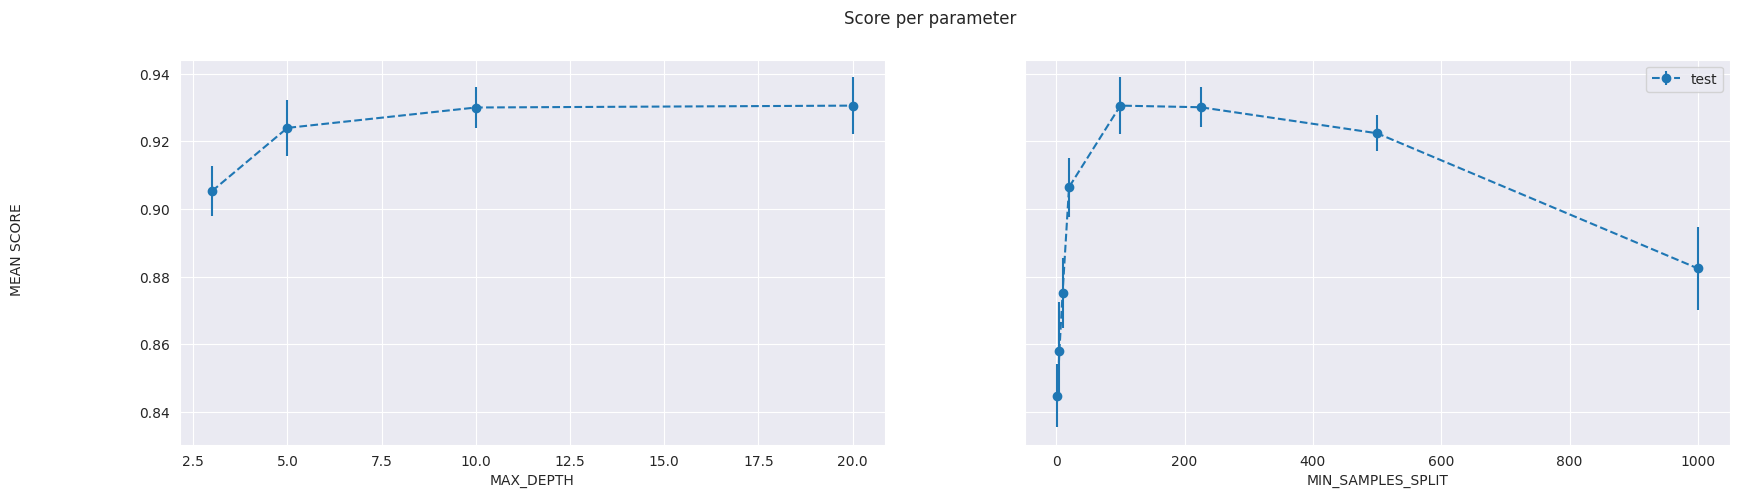

{'DecisionTree_': {'auc': 0.8823482409880602, 'accuracy': 0.8922018348623854, 'precision_0': 0.8525641025641025, 'recall_0': 0.8471337579617835, 'precision_1': 0.9142857142857143, 'recall_1': 0.9175627240143369, 'report': '              precision    recall  f1-score   support\n\n           0       0.85      0.85      0.85       157\n           1       0.91      0.92      0.92       279\n\n    accuracy                           0.89       436\n   macro avg       0.88      0.88      0.88       436\nweighted avg       0.89      0.89      0.89       436\n', 'best_model': DecisionTreeClassifier(max_depth=20, min_samples_split=100), 'best_params': {'max_depth': 20, 'min_samples_split': 100}, 'column_items': ['marital_status', 'application_mode', 'application_order', 'course', 'attendance_type', 'previous_qualification', 'nationality', 'mother_qualification', 'father_qualification', 'mother_occupation', 'father_occupation', 'displaced', 'special_needs', 'debtor', 'tuition_fees_up_to_date', 's

In [55]:
classifiers_results = {}
grid_search = report_results(train_df, validation_df, "", colum_combinations["person_and_economic_and_academic_performance_indicators"], "DecisionTree", tree.DecisionTreeClassifier(), {
    "max_depth": [3, 5, 10, 20, None],
    "min_samples_split": [2, 5, 10, 20, 100, 225, 500, 1000]
    })
print(grid_search.best_params_)
plot_search_results(grid_search)
print(classifiers_results)


## knn

{'n_neighbors': 50, 'weights': 'distance'}


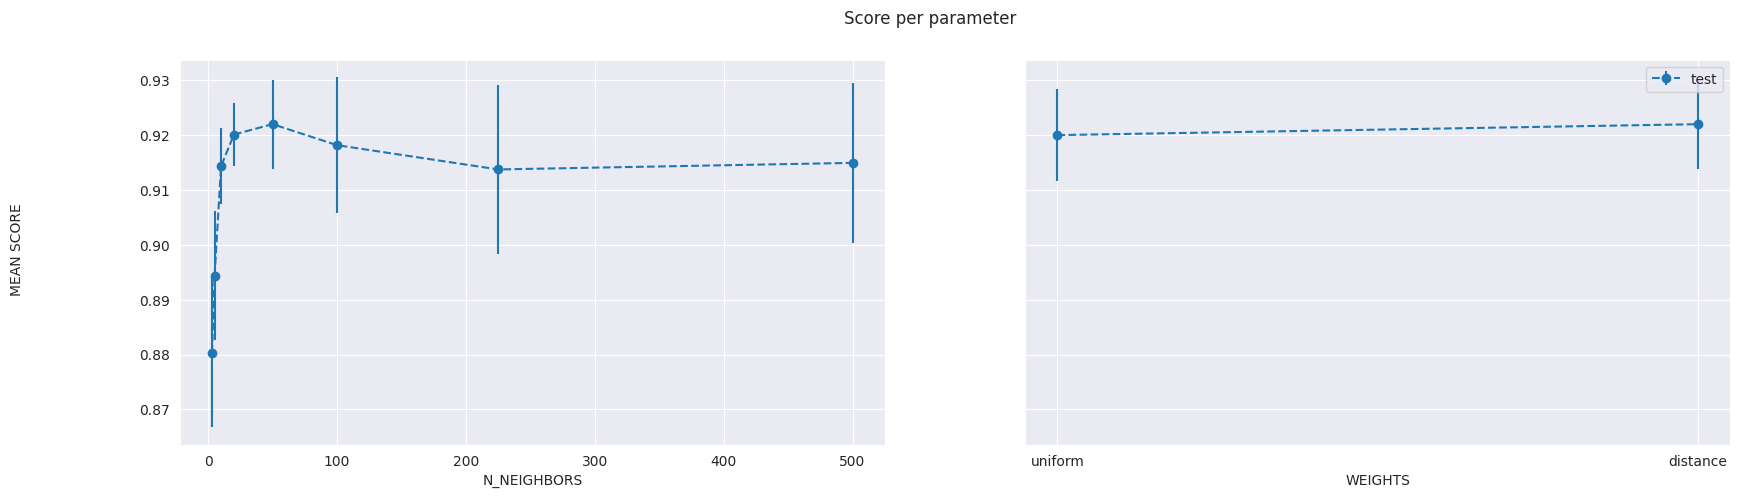

In [56]:

grid_search = report_results(train_df, validation_df, "", colum_combinations["person_and_economic_and_academic_performance_indicators"], f"knn", KNeighborsClassifier(), {
    "n_neighbors": [3, 5, 10, 20, 50, 100, 225, 500],
    "weights": ["uniform", "distance"]
    })
print(grid_search.best_params_)
plot_search_results(grid_search)

## Naive bayes

In [57]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB, ComplementNB

classifiers_results = {}
report_results(train_df, validation_df, "", colum_combinations["person_and_economic_and_academic_performance_indicators"], "GaussianNB", GaussianNB(), {
    # No tunable params, but GridSearchCV requires at least one key
    "var_smoothing": [1e-9]
    })

report_results(train_df, validation_df, "", colum_combinations["person_and_economic_and_academic_performance_indicators"], "BernoulliNB", BernoulliNB(), {
    # No tunable params, but GridSearchCV requires at least one key
    "alpha": [1]
    })

report_results(train_df, validation_df, "", colum_combinations["person_and_economic_and_academic_performance_indicators"], "MultinomialNB", MultinomialNB(), {
    # No tunable params, but GridSearchCV requires at least one key
    "alpha": [1]
    }, minmax_scaler=True)

report_results(train_df, validation_df, "", colum_combinations["person_and_economic_and_academic_performance_indicators"], "ComplementNB", ComplementNB(), {
    # No tunable params, but GridSearchCV requires at least one key
    "alpha": [1]
    }, minmax_scaler=True)

pd.DataFrame(classifiers_results).T

,auc,accuracy,precision_0,recall_0,precision_1,recall_1,report,best_model,best_params,column_items
GaussianNB_,0.819453,0.850917,0.853846,0.707006,0.849673,0.9319,precision recall f1-score ...,GaussianNB(),{'var_smoothing': 1e-09},"[marital_status, application_mode, application..."
BernoulliNB_,0.863046,0.885321,0.884892,0.783439,0.885522,0.942652,precision recall f1-score ...,BernoulliNB(alpha=1),{'alpha': 1},"[marital_status, application_mode, application..."
MultinomialNB_,0.819236,0.825688,0.739645,0.796178,0.88015,0.842294,precision recall f1-score ...,MultinomialNB(alpha=1),{'alpha': 1},"[marital_status, application_mode, application..."
ComplementNB_,0.818437,0.821101,0.725714,0.808917,0.885057,0.827957,precision recall f1-score ...,ComplementNB(alpha=1),{'alpha': 1},"[marital_status, application_mode, application..."


## Ensemble methods
### RandomForestClassifier

{'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 100, 'random_state': 42}


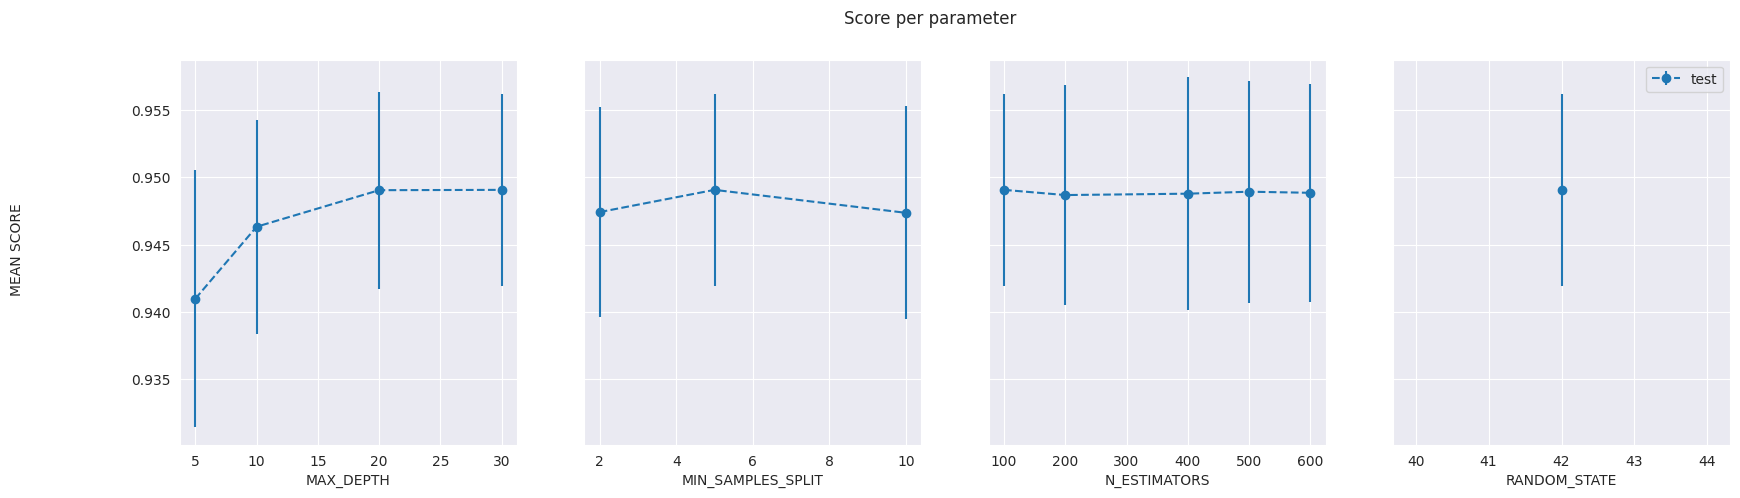

In [58]:

classifiers_results = {}
grid_search = report_results(train_df, validation_df, "", colum_combinations["person_and_economic_and_academic_performance_indicators"], f"RandomForestClassifier", RandomForestClassifier(), {
    "n_estimators": [100, 200, 400, 500, 600],
    "max_depth": [5, 10, 20, 30, None],
    "min_samples_split": [2, 5, 10],
    "random_state": [42]
    })
print(grid_search.best_params_)
plot_search_results(grid_search)

### AdaBoostClassifier

{'learning_rate': 0.1, 'n_estimators': 400, 'random_state': 42}


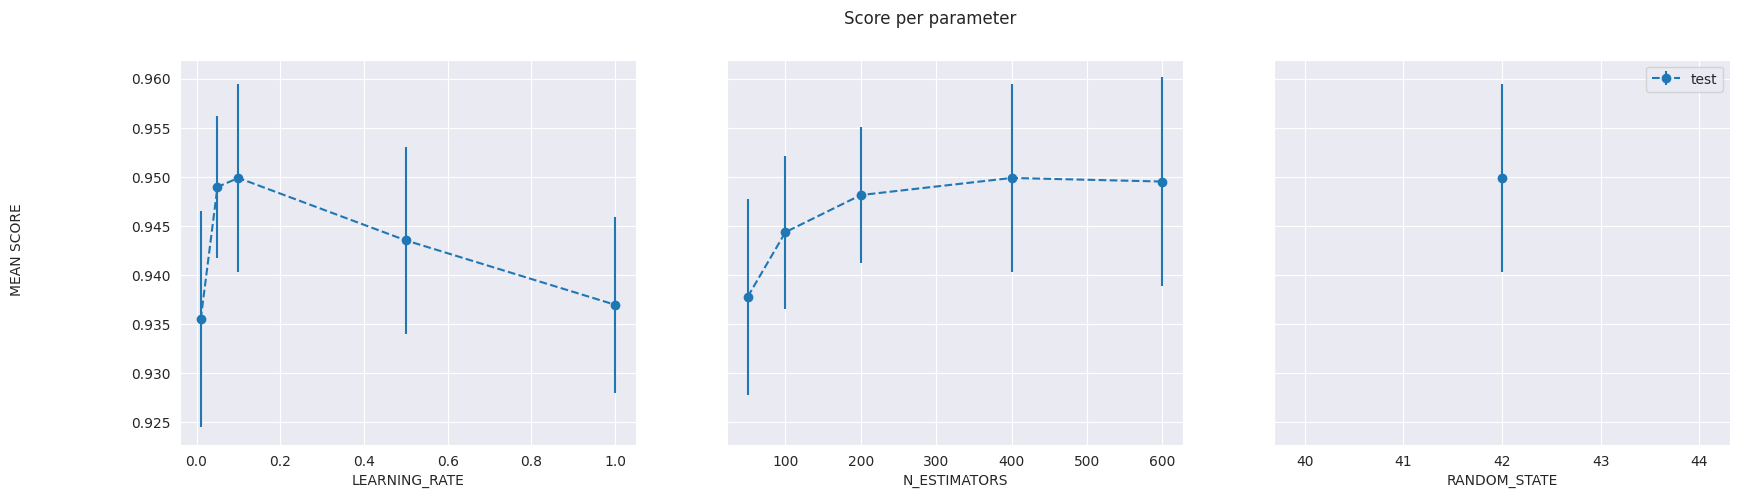

In [59]:
from sklearn.ensemble import AdaBoostClassifier

grid_search = report_results(train_df, validation_df, "", colum_combinations["person_and_economic_and_academic_performance_indicators"], f"AdaBoostClassifier", AdaBoostClassifier(), param_grid = {
    "n_estimators": [50, 100, 200, 400, 600],
    "learning_rate": [0.01, 0.05, 0.1, 0.5, 1.0],
    "random_state": [42]
})
print(grid_search.best_params_)
plot_search_results(grid_search)


### BaggingClassifier

{'max_features': 0.7, 'max_samples': 0.7, 'n_estimators': 100, 'random_state': 42}


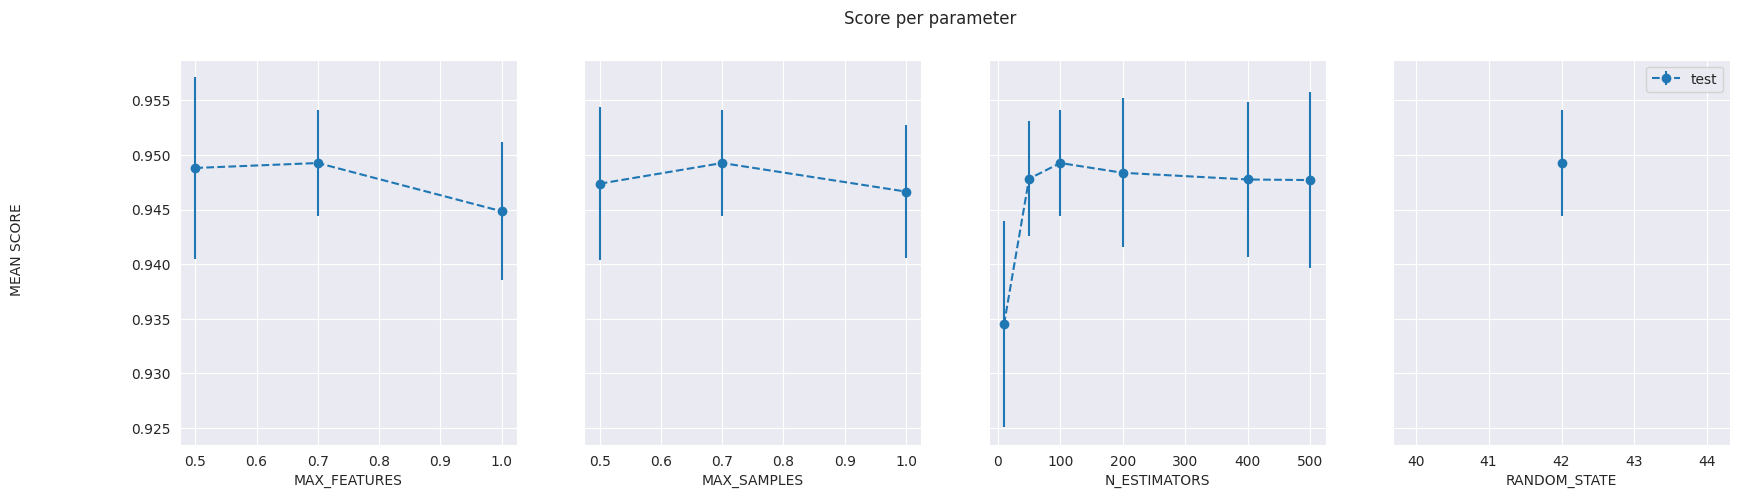

In [60]:
from sklearn.ensemble import BaggingClassifier

grid_search = report_results(train_df, validation_df, "", colum_combinations["person_and_economic_and_academic_performance_indicators"], f"BaggingClassifier", BaggingClassifier(), param_grid = {
    "n_estimators": [10, 50, 100, 200, 400, 500],
    "max_samples": [0.5, 0.7, 1.0],
    "max_features": [0.5, 0.7, 1.0],
    "random_state": [42]
})
print(grid_search.best_params_)
plot_search_results(grid_search)

print all results for the assamble methods

In [61]:
pd.DataFrame(classifiers_results).T

,auc,accuracy,precision_0,recall_0,precision_1,recall_1,report,best_model,best_params,column_items
RandomForestClassifier_,0.888923,0.905963,0.902778,0.828025,0.907534,0.949821,precision recall f1-score ...,"(DecisionTreeClassifier(max_depth=30, max_feat...","{'max_depth': 30, 'min_samples_split': 5, 'n_e...","[marital_status, application_mode, application..."
AdaBoostClassifier_,0.888923,0.905963,0.902778,0.828025,0.907534,0.949821,precision recall f1-score ...,"(DecisionTreeClassifier(max_depth=1, random_st...","{'learning_rate': 0.1, 'n_estimators': 400, 'r...","[marital_status, application_mode, application..."
BaggingClassifier_,0.8935,0.908257,0.897959,0.840764,0.913495,0.946237,precision recall f1-score ...,(DecisionTreeClassifier(random_state=195292617...,"{'max_features': 0.7, 'max_samples': 0.7, 'n_e...","[marital_status, application_mode, application..."


# Combining everything

In [62]:
def test_algoritms(column_name, columns, train_df, test_df):
    report_results(train_df, test_df, column_name, columns, "DecisionTree", tree.DecisionTreeClassifier(), {
    "max_depth": [3, 5, 10, 20, None],
    "min_samples_split": [2, 5, 10, 20, 100, 225, 500, 1000],
    "random_state": [42]
    })

    report_results(train_df, test_df,column_name, columns, f"knn", KNeighborsClassifier(), {
    "n_neighbors": [3, 5, 10, 20, 50, 100, 225, 500],
    "weights": ["uniform", "distance"],
    })
    report_results(train_df, test_df,column_name, columns, "BernoulliNB", BernoulliNB(), {
    # No tunable params, but GridSearchCV requires at least one key
    "alpha": [1]
    })

    report_results(train_df, test_df,column_name, columns, f"Random_forest", RandomForestClassifier(), {
    "n_estimators": [100, 200, 400, 500, 600],
    "max_depth": [5, 10, 20, 30, None],
    "min_samples_split": [2, 5, 10],
    "random_state": [42]
    })

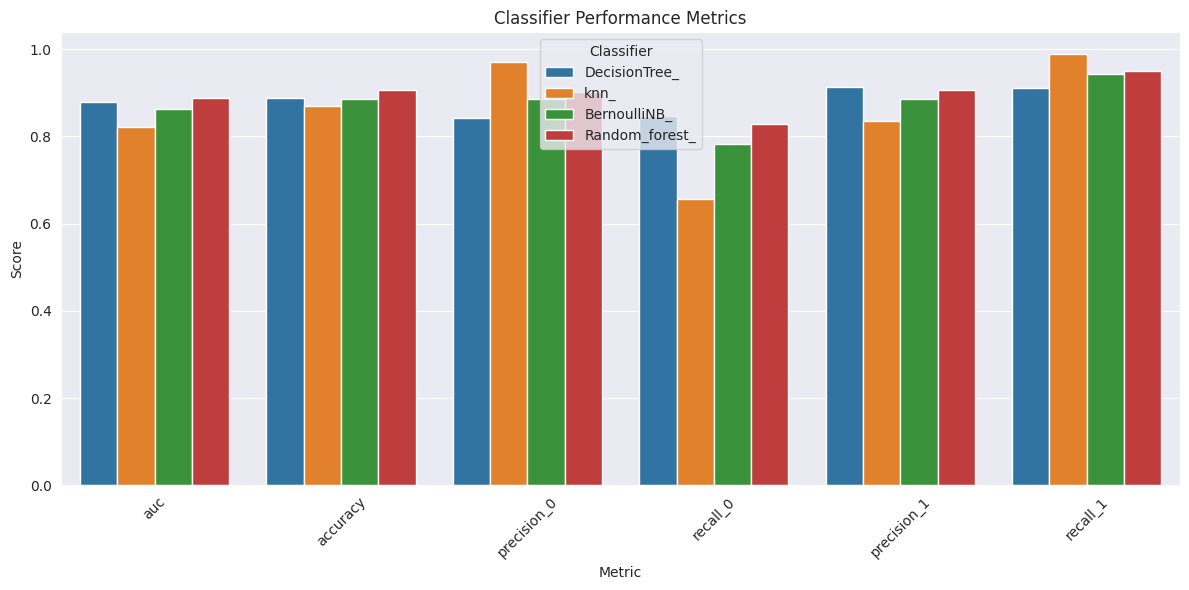

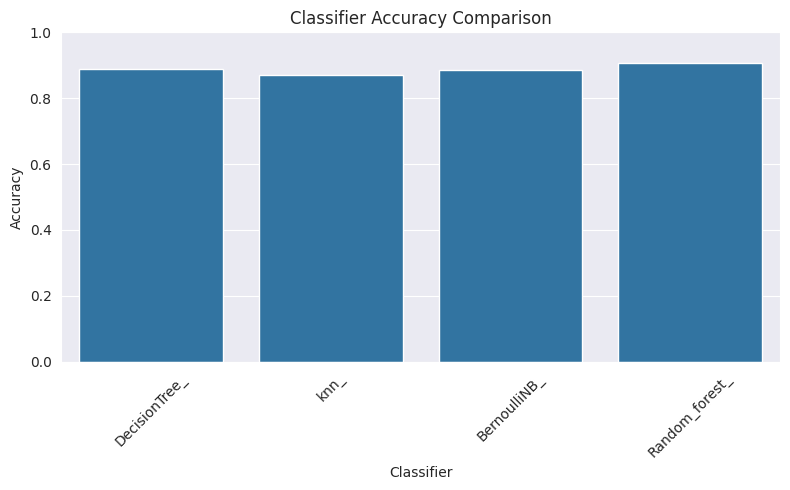

In [63]:
classifiers_results = {}

test_algoritms("", colum_combinations["person_and_economic_and_academic_performance_indicators"], train_df, validation_df)
results_df = pd.DataFrame(classifiers_results).T

metrics_to_plot = ['auc', 'accuracy', 'precision_0', 'recall_0', 'precision_1', 'recall_1']

# Reshape for seaborn
results_melted = results_df[metrics_to_plot].reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')
results_melted.rename(columns={'index': 'Classifier'}, inplace=True)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Metric', y='Score', hue='Classifier', data=results_melted)
plt.title('Classifier Performance Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Classifier')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x=results_df.index, y='accuracy', data=results_df)
plt.title('Classifier Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Classifier')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # accuracy range is from 0 to 1
plt.tight_layout()
plt.show()


In [64]:
classifiers_results = {}

for k in [5,10,15,20,25,30]:
    x = df[colum_combinations["person_and_economic_and_academic_performance_indicators"]]
    y = df[["target"]]
    b_best_features = select_kbest(x, y, k)
    print(f"K: {k} best features: {b_best_features}")
    test_algoritms(f"k_best_features_{k}", b_best_features, train_df, validation_df)

for column_name, columns in colum_combinations.items():
    test_algoritms(column_name, columns, train_df, validation_df)

pd.DataFrame(classifiers_results).T


K: 5 best features: Index(['curricular_units_1st_sem_approved',
       'curricular_units_2nd_sem_approved', 'curricular_units_2nd_sem_grade',
       'curricular_units_2nd_sem_grade_rounded', 'passing_grade_2nd_sem'],
      dtype='object')


/home/steen/Documents/Data mining project/Assignment2/.venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/steen/Documents/Data mining project/Assignment2/.venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


K: 10 best features: Index(['tuition_fees_up_to_date', 'scholarship_holder',
       'curricular_units_1st_sem_approved', 'curricular_units_1st_sem_grade',
       'curricular_units_2nd_sem_approved', 'curricular_units_2nd_sem_grade',
       'curricular_units_1st_sem_grade_rounded',
       'curricular_units_2nd_sem_grade_rounded', 'passing_grade_1st_sem',
       'passing_grade_2nd_sem'],
      dtype='object')


/home/steen/Documents/Data mining project/Assignment2/.venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


K: 15 best features: Index(['application_mode', 'debtor', 'tuition_fees_up_to_date',
       'scholarship_holder', 'age_at_enrollment',
       'curricular_units_1st_sem_approved', 'curricular_units_1st_sem_grade',
       'curricular_units_2nd_sem_enrolled',
       'curricular_units_2nd_sem_approved', 'curricular_units_2nd_sem_grade',
       'curricular_units_1st_sem_grade_rounded',
       'curricular_units_2nd_sem_grade_rounded', 'passing_grade_1st_sem',
       'passing_grade_2nd_sem', 'gender'],
      dtype='object')


/home/steen/Documents/Data mining project/Assignment2/.venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


K: 20 best features: Index(['application_mode', 'application_order', 'previous_qualification',
       'displaced', 'debtor', 'tuition_fees_up_to_date', 'scholarship_holder',
       'age_at_enrollment', 'curricular_units_1st_sem_enrolled',
       'curricular_units_1st_sem_approved', 'curricular_units_1st_sem_grade',
       'curricular_units_2nd_sem_enrolled',
       'curricular_units_2nd_sem_evaluations',
       'curricular_units_2nd_sem_approved', 'curricular_units_2nd_sem_grade',
       'curricular_units_1st_sem_grade_rounded',
       'curricular_units_2nd_sem_grade_rounded', 'passing_grade_1st_sem',
       'passing_grade_2nd_sem', 'gender'],
      dtype='object')


/home/steen/Documents/Data mining project/Assignment2/.venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


K: 25 best features: Index(['marital_status', 'application_mode', 'application_order',
       'attendance_type', 'previous_qualification', 'father_occupation',
       'displaced', 'debtor', 'tuition_fees_up_to_date', 'scholarship_holder',
       'age_at_enrollment', 'curricular_units_1st_sem_enrolled',
       'curricular_units_1st_sem_approved', 'curricular_units_1st_sem_grade',
       'curricular_units_1st_sem_without_evaluations',
       'curricular_units_2nd_sem_enrolled',
       'curricular_units_2nd_sem_evaluations',
       'curricular_units_2nd_sem_approved', 'curricular_units_2nd_sem_grade',
       'curricular_units_2nd_sem_without_evaluations',
       'curricular_units_1st_sem_grade_rounded',
       'curricular_units_2nd_sem_grade_rounded', 'passing_grade_1st_sem',
       'passing_grade_2nd_sem', 'gender'],
      dtype='object')


/home/steen/Documents/Data mining project/Assignment2/.venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


K: 30 best features: Index(['marital_status', 'application_mode', 'application_order',
       'attendance_type', 'previous_qualification', 'mother_qualification',
       'mother_occupation', 'father_occupation', 'displaced', 'debtor',
       'tuition_fees_up_to_date', 'scholarship_holder', 'age_at_enrollment',
       'curricular_units_1st_sem_enrolled',
       'curricular_units_1st_sem_evaluations',
       'curricular_units_1st_sem_approved', 'curricular_units_1st_sem_grade',
       'curricular_units_1st_sem_without_evaluations',
       'curricular_units_2nd_sem_credited',
       'curricular_units_2nd_sem_enrolled',
       'curricular_units_2nd_sem_evaluations',
       'curricular_units_2nd_sem_approved', 'curricular_units_2nd_sem_grade',
       'curricular_units_2nd_sem_without_evaluations', 'gdp',
       'curricular_units_1st_sem_grade_rounded',
       'curricular_units_2nd_sem_grade_rounded', 'passing_grade_1st_sem',
       'passing_grade_2nd_sem', 'gender'],
      dtype='object')


,auc,accuracy,precision_0,recall_0,precision_1,recall_1,report,best_model,best_params,column_items
DecisionTree_k_best_features_5,0.865626,0.876147,0.828025,0.828025,0.903226,0.903226,precision recall f1-score ...,"DecisionTreeClassifier(max_depth=5, min_sample...","{'max_depth': 5, 'min_samples_split': 100, 'ra...","Index(['curricular_units_1st_sem_approved', ..."
knn_k_best_features_5,0.862247,0.880734,0.862069,0.796178,0.890034,0.928315,precision recall f1-score ...,KNeighborsClassifier(n_neighbors=50),"{'n_neighbors': 50, 'weights': 'uniform'}","Index(['curricular_units_1st_sem_approved', ..."
BernoulliNB_k_best_features_5,0.858663,0.876147,0.85034,0.796178,0.889273,0.921147,precision recall f1-score ...,BernoulliNB(alpha=1),{'alpha': 1},"Index(['curricular_units_1st_sem_approved', ..."
Random_forest_k_best_features_5,0.857464,0.869266,0.820513,0.815287,0.896429,0.899642,precision recall f1-score ...,"(DecisionTreeClassifier(max_depth=10, max_feat...","{'max_depth': 10, 'min_samples_split': 10, 'n_...","Index(['curricular_units_1st_sem_approved', ..."
DecisionTree_k_best_features_10,0.871402,0.885321,0.854305,0.821656,0.901754,0.921147,precision recall f1-score ...,"DecisionTreeClassifier(max_depth=20, min_sampl...","{'max_depth': 20, 'min_samples_split': 225, 'r...","Index(['tuition_fees_up_to_date', 'scholarship..."
knn_k_best_features_10,0.888923,0.905963,0.902778,0.828025,0.907534,0.949821,precision recall f1-score ...,"KNeighborsClassifier(n_neighbors=50, weights='...","{'n_neighbors': 50, 'weights': 'distance'}","Index(['tuition_fees_up_to_date', 'scholarship..."
BernoulliNB_k_best_features_10,0.828813,0.864679,0.901639,0.700637,0.850318,0.956989,precision recall f1-score ...,BernoulliNB(alpha=1),{'alpha': 1},"Index(['tuition_fees_up_to_date', 'scholarship..."
Random_forest_k_best_features_10,0.88454,0.896789,0.868421,0.840764,0.911972,0.928315,precision recall f1-score ...,"(DecisionTreeClassifier(max_depth=5, max_featu...","{'max_depth': 5, 'min_samples_split': 2, 'n_es...","Index(['tuition_fees_up_to_date', 'scholarship..."
DecisionTree_k_best_features_15,0.882942,0.887615,0.829268,0.866242,0.922794,0.899642,precision recall f1-score ...,"DecisionTreeClassifier(max_depth=20, min_sampl...","{'max_depth': 20, 'min_samples_split': 100, 'r...","Index(['application_mode', 'debtor', 'tuition_..."
knn_k_best_features_15,0.891914,0.915138,0.947761,0.808917,0.900662,0.97491,precision recall f1-score ...,KNeighborsClassifier(n_neighbors=20),"{'n_neighbors': 20, 'weights': 'uniform'}","Index(['application_mode', 'debtor', 'tuition_..."


## Use test

In [75]:
parameters = classifiers_results["Random_forest_k_best_features_25"]["best_params"]
columns = classifiers_results["Random_forest_k_best_features_25"]["column_items"]

print(parameters)
parameters = {'max_depth': [20], 'min_samples_split': [5], 'n_estimators': [500], 'random_state': [42]}

report_results(train_df, test_df, "", columns, "Wining_item", RandomForestClassifier(), parameters)
print(classifiers_results["Wining_item_"])

{'max_depth': [[20]], 'min_samples_split': [[5]], 'n_estimators': [[500]], 'random_state': [[42]]}
{'auc': 0.8792395104895104, 'accuracy': 0.8899082568807339, 'precision_0': 0.8950617283950617, 'recall_0': 0.8238636363636364, 'precision_1': 0.8868613138686131, 'recall_1': 0.9346153846153846, 'report': '              precision    recall  f1-score   support\n\n           0       0.90      0.82      0.86       176\n           1       0.89      0.93      0.91       260\n\n    accuracy                           0.89       436\n   macro avg       0.89      0.88      0.88       436\nweighted avg       0.89      0.89      0.89       436\n', 'best_model': RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=500,
                       random_state=42), 'best_params': {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 500, 'random_state': 42}, 'column_items': Index(['marital_status', 'application_mode', 'application_order',
       'attendance_type', 'previous_qualificati